In [1]:
import pandas as pd 
from sklearn_extra.cluster import KMedoids
df = pd.read_csv("../../data/distance_matrix.csv")

In [2]:
kmedoids = KMedoids(n_clusters=8, random_state=0).fit(df.to_numpy())

In [3]:
kmedoids.cluster_centers_ # use this to get center point of 

array([[0.3672454 , 0.48911968, 0.39720221, ..., 0.61171425, 0.38780669,
        0.32752703],
       [0.3559211 , 0.22800262, 0.71921385, ..., 0.18560684, 0.68494874,
        0.58793369],
       [0.50417035, 0.68891832, 0.35545772, ..., 0.82572811, 0.36869688,
        0.35925779],
       ...,
       [0.55318636, 0.7290194 , 0.38185465, ..., 0.8322174 , 0.38003144,
        0.43138478],
       [0.48250227, 0.64000404, 0.36284149, ..., 0.77567669, 0.36656503,
        0.37020488],
       [0.41642951, 0.57502277, 0.38142054, ..., 0.73366195, 0.39416129,
        0.33271664]])

In [18]:
df = pd.read_csv("../../data/distance_matrix_0930.csv")
df
df["Unnamed: 0"]
df = df.drop(["Unnamed: 0"], axis=1)
df = df.drop(["Unnamed: 0.1"], axis=1)
df.to_csv("../../data/distance_matrix_0930.csv", index=False)

In [3]:
df = pd.read_csv("../../data/distance_matrix_0930.csv")


In [14]:
df_activity = pd.read_csv("../../data/protein_data.csv")
names = df_activity["name"].tolist()


['1a4e',
 '1apx',
 '1bgp',
 '1dgh',
 '1dz9',
 '1ebe',
 '1gvh',
 '1gwf',
 '1gwh',
 '1hch',
 '1iyn',
 '1jio',
 '1lga',
 '1ly9',
 '1m7s',
 '1mjt',
 '1mqf',
 '1n6b',
 '1p3v',
 '1pa2',
 '1qgj',
 '1qpa',
 '1si8',
 '1sj2',
 '1sy7',
 '1u5u',
 '1ued',
 '1ulw',
 '1v8x',
 '1wox',
 '2a9e',
 '2d09',
 '2e39',
 '2hi4',
 '2iqf',
 '2j2m',
 '2nnj',
 '2ve3',
 '2vxh',
 '2w0a',
 '2wh8',
 '2wm4',
 '2x5l',
 '2xkr',
 '2yp1',
 '2z3t',
 '2zdo',
 '2zqx',
 '3aba',
 '3abb',
 '3atj',
 '3b4x',
 '3bk9',
 '3cv8',
 '3czh',
 '3czy',
 '3e65',
 '3gas',
 '3hb6',
 '3hdl',
 '3lgm',
 '3m8m',
 '3mdr',
 '3mgx',
 '3mvr',
 '3n9y',
 '3nn1',
 '3ozv',
 '3qpi',
 '3r9b',
 '3re8',
 '3riv',
 '3rke',
 '3rqo',
 '3rwl',
 '3s4f',
 '3t3q',
 '3t3z',
 '3ut2',
 '3uw8',
 '3v8d',
 '3vm4',
 '3vxi',
 '3wrh',
 '3wsp',
 '3wxo',
 '3zj5',
 '3zkp',
 '4a5g',
 '4au9',
 '4aul',
 '4b2y',
 '4b7f',
 '4ccp',
 '4coh',
 '4cuo',
 '4d1o',
 '4d3t',
 '4d6z',
 '4dnj',
 '4e2p',
 '4eji',
 '4ep6',
 '4g2c',
 '4g3j',
 '4g7t',
 '4ggv',
 '4gqe',
 '4grc',
 '4gs1',
 '4gt2',
 

In [24]:
rows_keep = []
for i in names: 
    rows_keep.append(df.columns.get_loc(i))

df[names].iloc[rows_keep]
df[names].iloc[rows_keep].to_csv("../../data/distance_matrix_0930_filtered.csv", index=False)

In [1]:
import pandas as pd
activity = pd.read_csv("../../data/protein_data.csv")
names = activity["name"]
selectivity = activity["label"].tolist()

In [3]:
list(set(selectivity))

['H', 'Y', 'C']

In [1]:
import networkx as nx 
import numpy as np
import pandas as pd


import os

folder = "../../data/communities/"
dist_mat = "../../data/communities/md_cys.csv"
cutoff = 7.5
#dist_matrix = np.genfromtxt(dist_mat, delimiter=',', skip_header=1).to_numpy()
dist_matrix = pd.read_csv(dist_mat, index_col=0).to_numpy()
names = np.genfromtxt(dist_mat, delimiter=',', dtype=str, max_rows=1)
#print(dist_matrix.columns)

std = np.std(dist_matrix.flatten())
dist_matrix = (dist_matrix) / std
dist_mask = np.where(dist_matrix > cutoff, 0, dist_matrix)
G = nx.from_numpy_array(dist_mask)


In [24]:
from glob import glob
import json 
import pandas as pd
import numpy as np

counts = []
cutoff = 7.5
root = "../../data/communities/"
dist_mat = root + "md_cys.csv"
name_file = root + "topo_file_list.txt"
compressed_dictionaries = glob(root + "*compressed.json")
# get all files with compressed in them 

dist_matrix = pd.read_csv(dist_mat, index_col=0).to_numpy()
names = np.genfromtxt(name_file, dtype=str)

names_stripped = [i.split("/")[-1] for i in list(names)]
index_stripped = [i.split("_")[1] for i in names_stripped]
protein_names = [i.split("_")[3] for i in names_stripped]


for ind, i in enumerate(protein_names):
    with open(root + i + "compressed.json", "r") as f:
        compressed_dict = json.load(f)
    for k, v in compressed_dict.items():
        index_center = v["index_center"]
        ind_center = int(v["name_center"].split("/")[-1].split("_")[1])
        if(ind_center == int(index_stripped[ind])):
            count_temp = v["count"]    
            counts.append(count_temp)
            break
    else: 
        print("warning!, no match for ", i)

            

(array([8.6900e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.2000e+01, 4.4000e+01, 4.0000e+01, 1.4000e+02, 3.2200e+02,
        8.4800e+02, 1.8320e+03, 3.8120e+03, 7.7140e+03, 1.4070e+04,
        2.2786e+04, 3.3814e+04, 4.4336e+04, 5.5156e+04, 6.2086e+04,
        6.6416e+04, 6.5434e+04, 6.0844e+04, 5.5184e+04, 4.6778e+04,
        3.9700e+04, 3.2786e+04, 2.7184e+04, 2.2098e+04, 1.8492e+04,
        1.4888e+04, 1.1730e+04, 9.3700e+03, 7.1960e+03, 5.7940e+03,
        4.6640e+03, 3.6080e+03, 2.8800e+03, 2.2880e+03, 1.7960e+03,
        1.5900e+03, 1.3120e+03, 1.0100e+03, 8.56

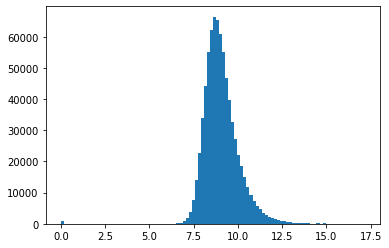

In [25]:
import matplotlib.pyplot as plt
std = np.std(dist_matrix)
dist_matrix = (dist_matrix) / std
plt.hist(dist_matrix.flatten(), bins=100)

(array([ 186.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           4.,    4.,   12.,    8.,   18.,   26.,   32.,   36.,   70.,
          82.,  102.,   90.,  106.,  118.,   92.,  100.,   80.,  106.,
         136.,   62.,  107.,  114.,  198.,  361.,  632., 1209., 1679.,
        2227., 2411., 2523., 2127., 1748., 1490., 1192.,  921.,  657.,
         585.,  494.,  300.,  274.,  221.,  190.,  176.,  216.,  242.,
         241.,  248.,  258.,  239.,  246.,  259.,  264.,  302.,  273.,
         312.,  269.,  330.,  333.,  374.,  336.,  376.,  382.,  452.,
         388.,  424.,  396.,  396.,  416.,  342.,  302.,  342.,  276.,
         294.,  254.,  232.,  214.,  218.,  182.,  140.,  120.,  136.,
          98.,   72.,   82.,   74.,   36.,   36.,   28.,   12.,    4.,
          10.]),
 array([0.        , 0.05673918, 0.11347836, 0.17021754, 0.22695673,
        0.28369591, 0.34043509, 0.39717427, 0.45391345, 0.51065263,
        0.56739182, 0.624131  , 0.68087018, 0.73760936, 0.79434854

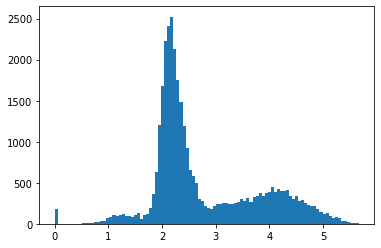

In [8]:
import matplotlib.pyplot as plt
import numpy as np 
dist_matrix = pd.read_csv("../../data/distance_matrix.csv", index_col=0).to_numpy()
std = np.std(dist_matrix)
dist_matrix = (dist_matrix) / std
plt.hist(dist_matrix.flatten(), bins=100)

In [2]:
spring_3D = nx.spring_layout(G,dim=3, seed = 1)
#print(spring_3D)
x_nodes = [spring_3D[i][0] for i in G]# x-coordinates of nodes
y_nodes = [spring_3D[i][1] for i in G]# y-coordinates
z_nodes = [spring_3D[i][2] for i in G]# z-coordinates
edge_list = G.edges()


x_edges=[]
y_edges=[]
z_edges=[]

#need to fill these with all of the coordiates
for edge in edge_list:
    #format: [beginning,ending,None]
    x_coords = [spring_3D[edge[0]][0],spring_3D[edge[1]][0],None]
    x_edges += x_coords

    y_coords = [spring_3D[edge[0]][1],spring_3D[edge[1]][1],None]
    y_edges += y_coords

    z_coords = [spring_3D[edge[0]][2],spring_3D[edge[1]][2],None]
    z_edges += z_coords

In [3]:
import plotly.graph_objects as go

#create a trace for the edges
trace_edges = go.Scatter3d(x=x_edges,
                        y=y_edges,
                        z=z_edges,
                        mode='lines',
                        line=dict(color='black', width=0.3),
                        hoverinfo='none')

#create a trace for the nodes
#color=community_label,text=club_labels,
trace_nodes = go.Scatter3d(x=x_nodes,
                         y=y_nodes,
                        z=z_nodes,
                        mode='markers',
                        marker=dict(symbol='circle',
                                    size=6,
                                    colorscale='spectral',
                       line=dict(color='black', width=0.2)),
                        text=names)

#we need to set the axis for the plot 
axis = dict(showbackground=False,
            showline=False,
            zeroline=False,
            showgrid=True,
            showticklabels=False,
            title='')


#also need to create the layout for our plot
layout = go.Layout(title="Network, Cutoff = " + str(cutoff),
                width=1000,
                height=1000,
                showlegend=False,
                scene=dict(xaxis=dict(axis),
                        yaxis=dict(axis),
                        zaxis=dict(axis),
                        ),
                margin=dict(t=100),
                hovermode='closest')

#Include the traces we want to plot and create a figure
data = [trace_edges, trace_nodes]
fig = go.Figure(data=data, layout=layout)

fig.show()
import plotly.io as pio
#pio.write_html(fig, auto_open=True, file = str(cutoff)+"_traj.html")
